# Orienting boxes to Frenet frames along a curve
# - using Matplotlib, NumPy and scikit-vectors

Copyright (c) 2017 Tor Olav Kristensen, http://subcube.com

https://github.com/t-o-k/scikit-vectors

Use of this source code is governed by a BSD-license that can be found in the LICENSE file.

In [1]:
# Uncomment one of these to get a Matplotlib backend with interactive plots 

# %matplotlib auto
# %matplotlib notebook

In [2]:
# Get the necessary libraries

import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

from skvectors import create_class_Cartesian_3D_Vector

In [3]:
# Size and resolution for Matplotlib figures

figure_size = (8, 6)
figure_dpi = 100

In [4]:
# The functions for the curve

a, b, c = 4, 3, 2


def f_x(t):

    return +a * np.cos(t)


def f_y(t):

    return +b * np.sin(t)


def f_z(t):

    return +c * np.sin(3 * t)

In [5]:
# Numerical approximation of the first derivative

def first_derivative(fn, h=1e-4):

    h2 = 2 * h


    def d1_fn(t):

        return (fn(t + h) - fn(t - h)) / h2


    return d1_fn

In [6]:
# Numerical approximation of the second derivative

def second_derivative(fn, h=1e-4):

    hh = h**2


    def d2_fn(t):

        return (fn(t + h) - 2 * fn(t) + fn(t - h)) / hh


    return d2_fn

In [7]:
# Create derivative functions for the curve

d1_f_x = first_derivative(f_x)
d1_f_y = first_derivative(f_y)
d1_f_z = first_derivative(f_z)

d2_f_x = second_derivative(f_x)
d2_f_y = second_derivative(f_y)
d2_f_z = second_derivative(f_z)

In [8]:
# Make a vector class that can hold all the points along the curve

no_of_points_along_curve = 90

NP3 = \
    create_class_Cartesian_3D_Vector(
        name = 'NP3',
        component_names = 'xyz',
        brackets = '<>',
        sep = ', ',
        cnull = np.zeros(no_of_points_along_curve),
        cunit = np.ones(no_of_points_along_curve),
        functions = \
            {
                'not': np.logical_not,
                'and': np.logical_and,
                'or': np.logical_or,
                'all': np.all,
                'any': np.any,
                'min': np.minimum,
                'max': np.maximum,
                'abs': np.absolute,
                'trunc': np.trunc,
                'ceil': np.ceil,
                'copysign': np.copysign,
                'log10': np.log10,
                'cos': np.cos,
                'sin': np.sin,
                'atan2': np.arctan2,
                'pi': np.pi
            }
    )

In [9]:
# Calculate the position vectors for the points along the curve

t = np.linspace(-np.pi, +np.pi, no_of_points_along_curve)

p_o = \
    NP3(
        x = f_x(t),
        y = f_y(t),
        z = f_z(t)
    )                     

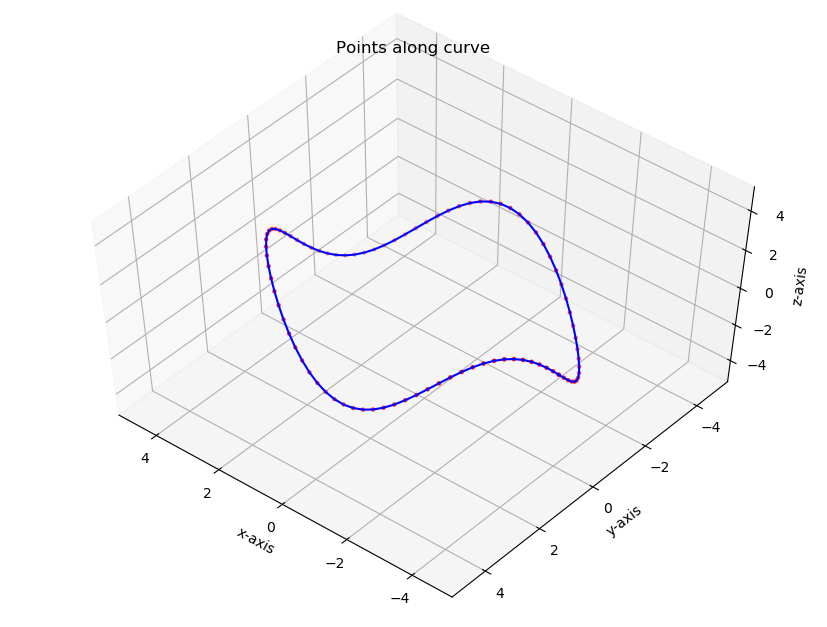

In [10]:
# Show the curve

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
ax = Axes3D(fig)
ax.set_title('Points along curve')
ax.scatter(p_o.x, p_o.y, p_o.z, c='r', marker='.')
ax.plot(p_o.x, p_o.y, p_o.z, c='b')
ax.set_xlim(-5, +5)
ax.set_ylim(-5, +5)
ax.set_zlim(-5, +5)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.view_init(elev=55, azim=130)

plt.show()

In [11]:
# The corners for a box

d, e, f = 1, 4, 2
scale = 1 / 10

d, e, f = scale * d, scale * e, scale * f

V3 = create_class_Cartesian_3D_Vector('V3', 'xyz')

box_corners = \
    [
        V3(-d, -e, -f),
        V3(+d, -e, -f),
        V3(+d, +e, -f),
        V3(-d, +e, -f),
        V3(-d, -e, +f),
        V3(+d, -e, +f),
        V3(+d, +e, +f),
        V3(-d, +e, +f)
    ]

In [12]:
# The edges of the box

line_indices = \
    [
        (0, 1),
        (2, 3),
        (4, 5),
        (6, 7),
        (1, 2),
        (3, 0),
        (5, 6),
        (7, 4),
        (0, 4),
        (1, 5),
        (2, 6),
        (3, 7)
    ]
line_colors = 'rrrrggggbbbb'

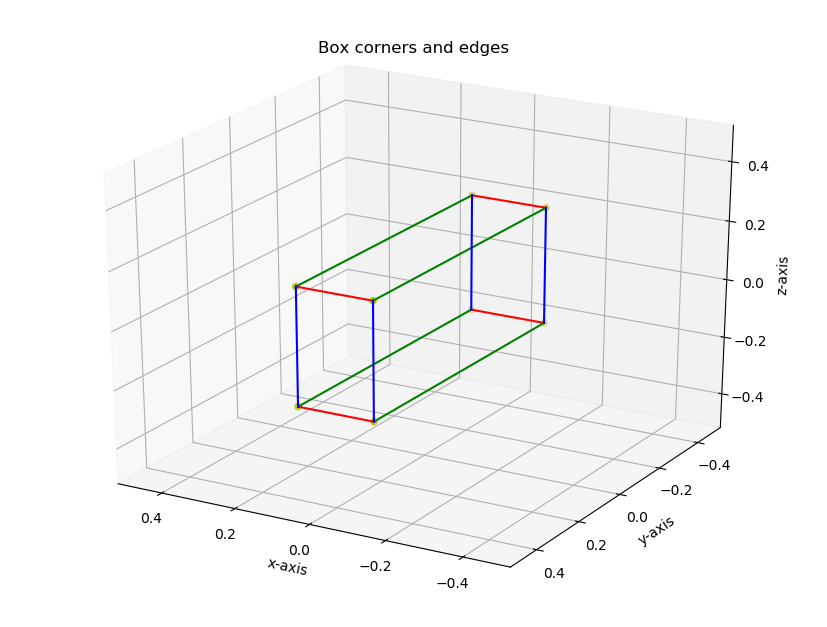

In [13]:
# Show the box corners and edges

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
ax = Axes3D(fig)
ax.set_title('Box corners and edges')
x, y, z = zip(*box_corners)
ax.scatter(x, y, z, c='y', marker='o')
for (i0, i1), color in zip(line_indices, line_colors):
    ax.plot(
        [ box_corners[i0].x, box_corners[i1].x ],
        [ box_corners[i0].y, box_corners[i1].y ],
        [ box_corners[i0].z, box_corners[i1].z ],
        color = color
    )
ax.set_xlim(-0.5, +0.5)
ax.set_ylim(-0.5, +0.5)
ax.set_zlim(-0.5, +0.5)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.view_init(elev=25, azim=120)

plt.show()

In [14]:
# The sides of the box 

rectangle_indices = \
    [
        (0, 3, 7, 4),
        (1, 2, 6, 5),
        (0, 1, 5, 4),
        (3, 2, 6, 7),
        (0, 1, 2, 3),
        (4, 5, 6, 7)
    ]
rectangle_colors = 'rrggbb'

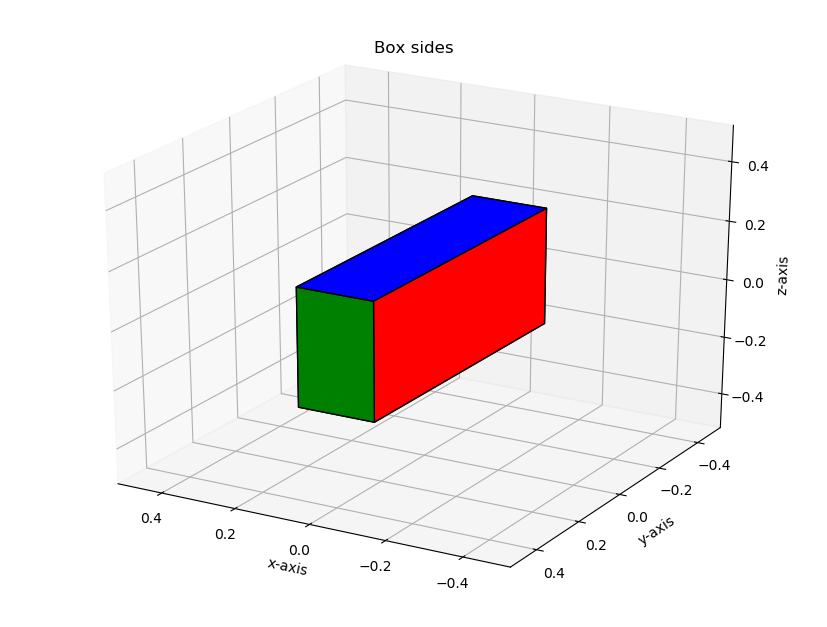

In [15]:
# Show the box sides

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
ax = Axes3D(fig)
ax.set_title('Box sides')
for indices, color in zip(rectangle_indices, rectangle_colors):
    vertices = \
        [
            box_corners[i]
            for i in indices
        ]
    rectangle = Poly3DCollection([ vertices ])
    rectangle.set_color(color)
    rectangle.set_edgecolor('k')
    ax.add_collection3d(rectangle)
x, y, z = zip(*box_corners)
ax.set_xlim(-0.5, +0.5)
ax.set_ylim(-0.5, +0.5)
ax.set_zlim(-0.5, +0.5)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.view_init(elev=25, azim=120)

plt.show()

In [16]:
# Calculate the vectors for the first derivatives at the points along the curve

v_d1 = \
    NP3(
        x = d1_f_x(t),
        y = d1_f_y(t),
        z = d1_f_z(t)
    )

In [17]:
# Calculate the vectors from the second derivatives at the points along the curve

v_d2 = \
    NP3(
        x = d2_f_x(t),
        y = d2_f_y(t),
        z = d2_f_z(t)
    )

In [18]:
# Calculate the vectors for all the Frenet frames along the curve

# Tangent vectors at the points along the curve
v_t = v_d1.normalize()

# Binormal vectors at the points along the curve
v_b = v_d1.cross(v_d2).normalize()

# Normal vectors at the points along the curve
v_n = v_t.cross(v_b)

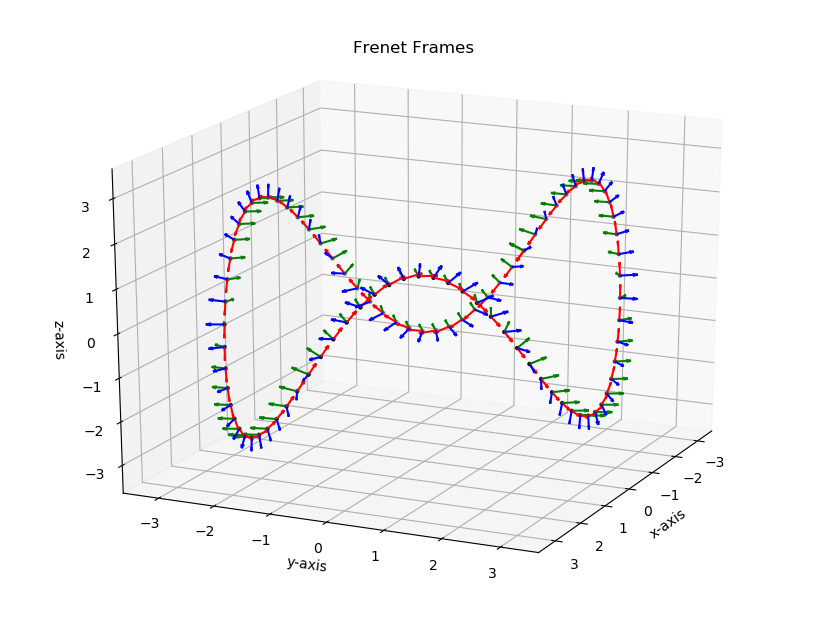

In [19]:
# Show the Frenet frames vectors

vector_length = 0.3

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
ax = Axes3D(fig)
ax.set_title('Frenet Frames')
ax.scatter(p_o.x, p_o.y, p_o.z, c='k', marker='.')
ax.quiver(
    p_o.x, p_o.y, p_o.z,
    v_t.x, v_t.y, v_t.z,
    length = vector_length,
    pivot = 'tail',
    color = 'r'
)
ax.quiver(
    p_o.x, p_o.y, p_o.z,
    v_b.x, v_b.y, v_b.z,
    length = vector_length,
    pivot = 'tail',
    color = 'g'
)
ax.quiver(
    p_o.x, p_o.y, p_o.z,
    v_n.x, v_n.y, v_n.z,
    length = vector_length,
    pivot = 'tail',
    color = 'b'
)
ax.set_xlim(-3.5, +3.5)
ax.set_ylim(-3.5, +3.5)
ax.set_zlim(-3.5, +3.5)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.view_init(elev=20, azim=25)
# ax.view_init(elev=60, azim=35)

plt.show()

In [20]:
# Reorient all the box corners in all the Frenet frames

box_corners_transformed = \
    [
        p_o + corner.x * v_t + corner.y * v_b + corner.z * v_n
        for corner in box_corners
    ]

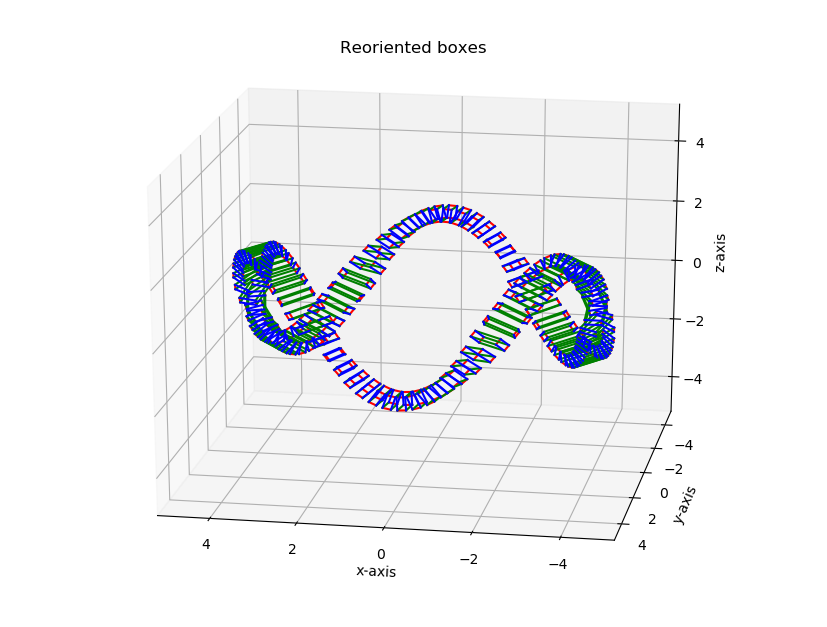

In [21]:
# Show the edges for all the reoriented boxes along the curve

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
ax = Axes3D(fig)
ax.set_title('Reoriented boxes')
for (i0, i1), color in zip(line_indices, line_colors):
    p0 = box_corners_transformed[i0]
    p1 = box_corners_transformed[i1]
    for k in range(no_of_points_along_curve-1):
        ax.plot(
            [ p0.x[k], p1.x[k] ],
            [ p0.y[k], p1.y[k] ],
            [ p0.z[k], p1.z[k] ],
            color = color
        )
ax.set_xlim(-5, +5)
ax.set_ylim(-5, +5)
ax.set_zlim(-5, +5)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.view_init(elev=20, azim=100)

plt.show()

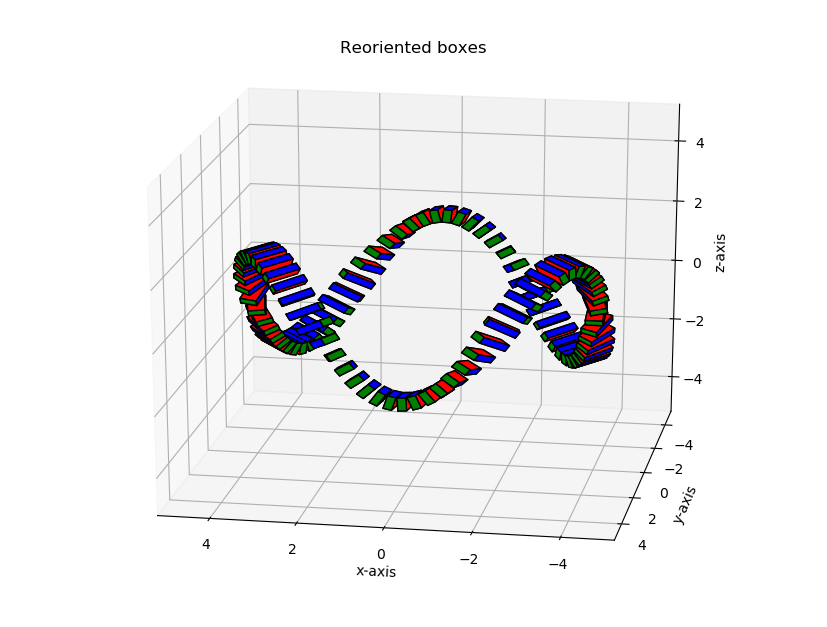

In [22]:
# Show the sides for all the reoriented boxes along the curve

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
ax = Axes3D(fig)
ax.set_title('Reoriented boxes')
for (i0, i1, i2, i3), color in zip(rectangle_indices, rectangle_colors):
    p0 = box_corners_transformed[i0]
    p1 = box_corners_transformed[i1]
    p2 = box_corners_transformed[i2]
    p3 = box_corners_transformed[i3]
    for k in range(no_of_points_along_curve-1):
        vertices = \
            (
                (p0.x[k], p0.y[k], p0.z[k]),
                (p1.x[k], p1.y[k], p1.z[k]),
                (p2.x[k], p2.y[k], p2.z[k]),
                (p3.x[k], p3.y[k], p3.z[k])
            )
        rectangle = Poly3DCollection([ vertices ])
        rectangle.set_color(color)
        rectangle.set_edgecolor('black')
        ax.add_collection3d(rectangle)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_xlim(-5, +5)
ax.set_ylim(-5, +5)
ax.set_zlim(-5, +5)
ax.view_init(elev=20, azim=100)

plt.show()

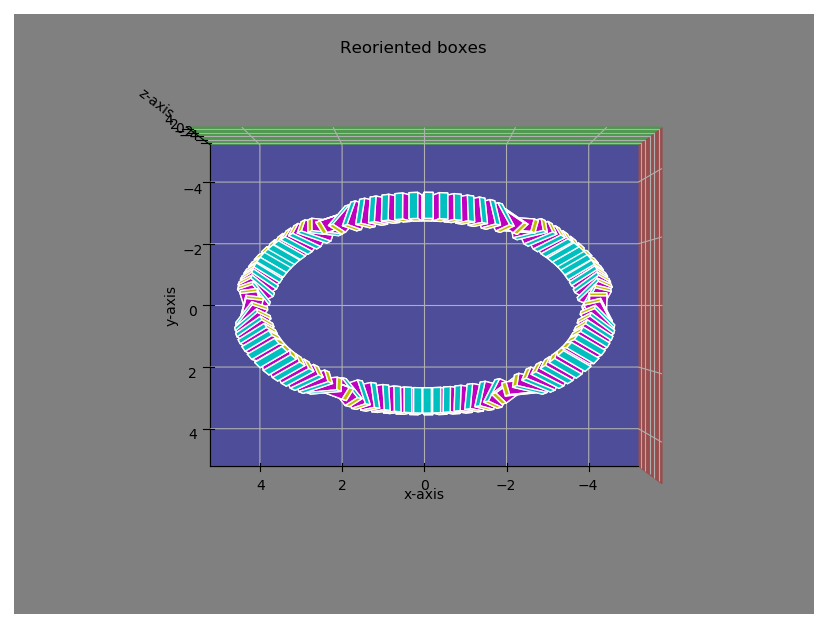

In [23]:
# Change some colors - and do it somewhat differently

color_r = (0.6, 0.3, 0.3, 1.0)
color_g = (0.3, 0.6, 0.3, 1.0)
color_b = (0.3, 0.3, 0.6, 1.0)
rectangle_colors = 'mmyycc'

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
ax = Axes3D(fig)
ax.set_title('Reoriented boxes')
ax.set_facecolor('gray')
ax.w_xaxis.set_pane_color(color_r)
ax.w_yaxis.set_pane_color(color_g)
ax.w_zaxis.set_pane_color(color_b)
for indices, color in zip(rectangle_indices, rectangle_colors):
    corners = [ box_corners_transformed[i] for i in indices ]
    for k in range(no_of_points_along_curve-1):
        fn = lambda cv: cv[k]  # To fetch element no. k from the np.array in each vector component
        vertices = tuple(p(fn) for p in corners)
        rectangle = Poly3DCollection([ vertices ])
        rectangle.set_color(color)
        rectangle.set_edgecolor('white')
        ax.add_collection3d(rectangle)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_xlim(-5, +5)
ax.set_ylim(-5, +5)
ax.set_zlim(-5, +5)
ax.view_init(elev=90, azim=90)

plt.show()